In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from utils import convolve2d

In [52]:
def pad_with(vector, pad_width, iaxis, kwargs):
    """用于np.pad的回调函数，以填充图像边界"""
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector

def dilation(image, selem):
    """
    对二值图像执行膨胀操作。
    
    参数:
        image: 输入的二值图像 (numpy array)，其中0表示背景，1表示前景。
        selem: 结构元素 (numpy array)，用于定义邻域形状。
    
    返回:
        dilated: 膨胀后的图像 (numpy array)。
    """
    # 获取结构元素的尺寸
    selem_height, selem_width = selem.shape
    selem_center = (selem_height // 2, selem_width // 2)

    # 计算需要填充的宽度
    pad_height = selem_height // 2
    pad_width = selem_width // 2

    # 填充图像以处理边界情况
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), pad_with)

    # 初始化膨胀后的图像
    dilated = np.zeros_like(image)

    # 执行膨胀操作
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # 提取与结构元素大小相同的区域
            region = padded_image[i:i+selem_height, j:j+selem_width]
            # 如果结构元素与区域的按位与结果中存在前景像素，则该位置为前景
            if np.any(selem * region):
                dilated[i, j] = 1

    return dilated

def erosion(image, selem):
    """
    对二值图像执行腐蚀操作。
    
    参数:
        image: 输入的二值图像 (numpy array)，其中0表示背景，1表示前景。
        selem: 结构元素 (numpy array)，用于定义邻域形状。
    
    返回:
        eroded: 腐蚀后的图像 (numpy array)。
    """
    # 获取结构元素的尺寸
    selem_height, selem_width = selem.shape
    selem_center = (selem_height // 2, selem_width // 2)

    # 计算需要填充的宽度
    pad_height = selem_height // 2
    pad_width = selem_width // 2

    # 填充图像以处理边界情况
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), pad_with)

    # 初始化腐蚀后的图像
    eroded = np.zeros_like(image)

    # 执行腐蚀操作
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # 提取与结构元素大小相同的区域
            region = padded_image[i:i+selem_height, j:j+selem_width]
            # 如果结构元素与区域的按位与结果全部为前景像素，则该位置为前景
            if np.all(selem <= region):
                eroded[i, j] = 1

    return eroded

def close_image(image, selem):
    """
    对二值图像执行闭运算。
    
    参数:
        image: 输入的二值图像 (numpy array)，其中0表示背景，1表示前景。
        selem: 结构元素 (numpy array)，用于定义邻域形状。
    
    返回:
        closed: 闭运算后的图像 (numpy array)。
    """
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # 转换为灰度图像
    _, image_th = cv.threshold(image_gray, 150, 255, cv.THRESH_BINARY) # 二值化
    # 先进行膨胀操作
    dilated = dilation(image_th, selem)
    # 然后进行腐蚀操作
    closed = erosion(dilated, selem)
    return closed

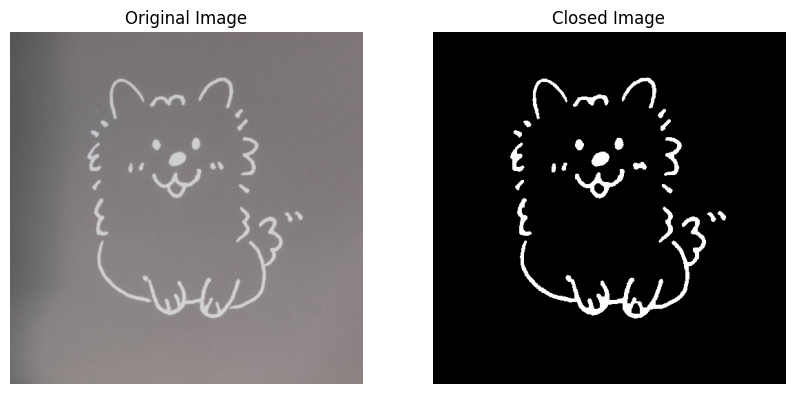

In [54]:
dog = cv.imread('dog.jpg')
dog_close = close_image(dog, np.ones((5, 5)))
# matplotlib显示图像
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(dog, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(dog_close, cmap='gray')
plt.title('Closed Image')
plt.axis('off')

plt.show()